# **Introducción**

Los arrecifes de coral son esenciales para la biodiversidad marina, ya que sustentan aproximadamente el 25% de todas las especies marinas y desempeñan un papel crítico en la protección de las costas, el apoyo a las pesquerías y el impulso de las economías turísticas. Sin embargo, están bajo una grave amenaza debido al cambio climático, la contaminación y otras actividades humanas, lo que lleva a fenómenos como el blanqueamiento de corales. El blanqueamiento de corales ocurre cuando los corales expulsan las algas simbióticas que les proporcionan color y energía, volviéndose blancos y potencialmente muriendo si las condiciones de estrés persisten.

Monitorear la salud de los corales es vital para preservar estos ecosistemas, pero los métodos tradicionales son laboriosos y tienen un alcance limitado. Los algoritmos de clasificación de imágenes impulsados por el aprendizaje automático ofrecen una solución al distinguir automáticamente entre corales blanqueados y saludables en imágenes submarinas. Estas herramientas pueden analizar grandes cantidades de datos de manera rápida y precisa, permitiendo un monitoreo más efectivo y a gran escala de la salud de los arrecifes. De ahí mi interés en este tema. Este avance tecnológico es crucial para proteger los arrecifes de coral y asegurar la supervivencia de la diversa vida marina que sustentan.

In [28]:
!pip install tensorflow opencv-python matplotlib numpy

In [45]:
#IMPORTACION DE LAS DEPENDENCIAS y DE DRIVE
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import imghdr
from google.colab import drive
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#CREANCIÓN DE RUTAS
ruta_corales = "/content/drive/My Drive/Corales"
blanqueados = 'bleached_corals'
saludables = 'healthy_corals'
ruta_aumentados = "/content/drive/My Drive/Corales_aug"
aug_sal = "bleached_augmented"
aug_blanq = "healthy_augmented"

In [47]:
#GUARDAR IMAGENES EN UNA LISTA
img_blanqueados = []
img_saludables = []

def get_image_files(carpeta, clase, lista):
  for archivo in os.listdir(os.path.join(carpeta,clase)):
      if archivo.endswith(".jpg") or archivo.endswith(".png") or archivo.endswith(".jpeg"):
          img_ruta = os.path.join(os.path.join(carpeta, clase), archivo)
          img = cv2.imread(img_ruta)
          if img is not None:
              lista.append(img)

In [48]:
get_image_files(ruta_corales, blanqueados, img_blanqueados)
get_image_files(ruta_corales, saludables, img_saludables)

array([[[149, 149, 149],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [162, 153, 149],
        [158, 149, 146],
        [158, 149, 146]],

       [[155, 155, 155],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [154, 145, 141],
        [139, 130, 127],
        [148, 139, 136]],

       [[152, 154, 154],
        [145, 147, 147],
        [141, 143, 143],
        ...,
        [142, 135, 132],
        [122, 115, 112],
        [141, 134, 131]],

       ...,

       [[149, 145, 144],
        [145, 141, 140],
        [152, 148, 147],
        ...,
        [113, 101, 101],
        [116, 100, 101],
        [113,  97,  98]],

       [[148, 144, 143],
        [146, 142, 141],
        [151, 147, 146],
        ...,
        [116, 102, 103],
        [120, 104, 105],
        [120, 102, 103]],

       [[139, 135, 134],
        [143, 139, 138],
        [139, 135, 134],
        ...,
        [115, 101, 102],
        [111,  96,  94],
        [112,  94,  93]]], dtype=uint8)
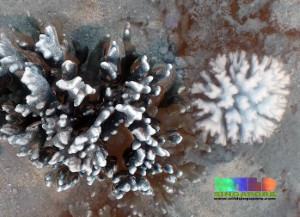

In [49]:
#GENERACIÓN DE VISUALIZACIÓN
img_blanqueados[0]

array([[[239, 233, 162],
        [243, 237, 166],
        [248, 244, 173],
        ...,
        [255, 248, 169],
        [249, 242, 163],
        [245, 238, 159]],

       [[237, 230, 157],
        [237, 231, 158],
        [240, 234, 161],
        ...,
        [229, 222, 143],
        [227, 217, 139],
        [222, 215, 136]],

       [[240, 231, 157],
        [239, 230, 156],
        [241, 232, 158],
        ...,
        [226, 216, 138],
        [226, 214, 136],
        [224, 214, 136]],

       ...,

       [[145, 157, 167],
        [135, 150, 159],
        [134, 149, 158],
        ...,
        [ 85, 130, 181],
        [105, 148, 197],
        [136, 177, 226]],

       [[123, 131, 144],
        [136, 145, 158],
        [125, 134, 147],
        ...,
        [110, 150, 199],
        [104, 144, 196],
        [101, 141, 193]],

       [[115, 128, 142],
        [112, 123, 137],
        [113, 119, 138],
        ...,
        [ 88, 118, 165],
        [ 65,  95, 150],
        [ 93, 121, 181]]], dtype=uint8)
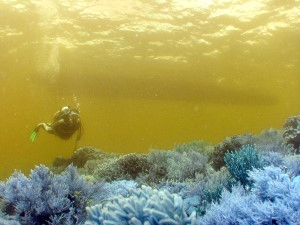

In [50]:
img_saludables[0]

In [51]:
# EN ESTA SECCIÓN SE ESTRUCTURAN EN UN DATASET
ds_not_aug= tf.keras.utils.image_dataset_from_directory(ruta_corales, image_size=(250,250), batch_size=20, shuffle=True)
iter_1 = ds_not_aug.as_numpy_iterator()
bache= iter_1.next()

Found 923 files belonging to 2 classes.


In [52]:
#VERIFICACIÓN DE LAS CLASES BLANQUEADAS
bache[0].shape

(20, 250, 250, 3)

In [53]:
#VERIFICACIÓN DE LAS CLASES SALUDABLES
bache[1]

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
      dtype=int32)

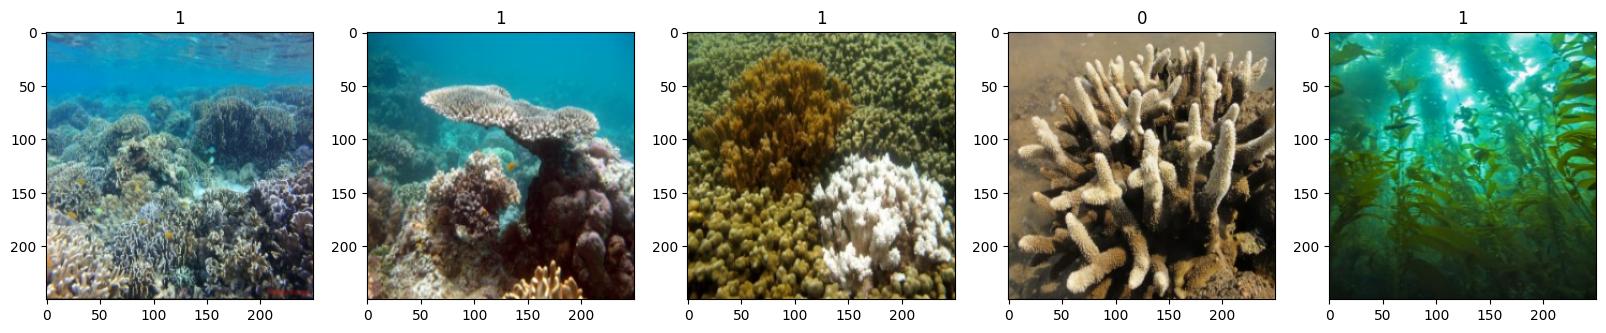

In [54]:
#VISUALIZACIÓN DE LAS CLASES BLANQUEADAS Y DE SALUDABLES
fig,ax = plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate(bache[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(bache[1][idx])

In [55]:
#NORMALIZACIÓN DE LAS IMAGENES
ds_NA_escalado = ds_not_aug.map(lambda x,y: (x/255,y))
test_baches=ds_NA_escalado.as_numpy_iterator().next()[0]
test_baches.max()

1.0

In [56]:
#SEGMENTACIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO
trn = int(len(ds_NA_escalado)*0.7)
val = int(len(ds_NA_escalado)*0.2)+1
tst = int(len(ds_NA_escalado)*0.1)+1
trn_NA = ds_NA_escalado.take(trn)
val_NA = ds_NA_escalado.skip(trn).take(val)
tst_NA = ds_NA_escalado.skip(trn+val).take(tst)

In [57]:
#IMPORTANDO DEPENDENCIAS PARA CREAR UNA RED NEURONAL CONVOLUCIONAL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [58]:
#CREACIÓN DE LA ARQUITECTURA DE LA RED NEURONAL
red_conv_NA = Sequential()
red_conv_NA.add(Conv2D(30, (3,3), 1, activation='relu', input_shape=(250,250,3)))
red_conv_NA.add(MaxPooling2D())
red_conv_NA.add(Dropout(0.3))
red_conv_NA.add(Conv2D(45, (3,3), 1, activation='relu'))
red_conv_NA.add(MaxPooling2D())
red_conv_NA.add(Dropout(0.2))
red_conv_NA.add(Conv2D(30, (3,3), 1, activation='relu'))
red_conv_NA.add(MaxPooling2D())
red_conv_NA.add(Flatten())
red_conv_NA.add(Dense(250, activation='relu'))
red_conv_NA.add(Dropout(0.5))
red_conv_NA.add(Dense(1, activation='sigmoid'))

In [59]:
#COMPILACIÓN DEL MODELO
red_conv_NA.compile(optimizer=Adam(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
#ESTRUCTURA DE LAS CAPAS DEL MODELO Y NÚMERO DE PARÁMETROS
red_conv_NA.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 248, 30)      840       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 124, 124, 30)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 124, 124, 30)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 45)      12195     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 61, 61, 45)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 61, 61, 45)       

In [62]:
#ENTRENAMIENTO DEL MODELO
historial_NA = red_conv_NA.fit(trn_NA, epochs=20, validation_data=val_NA)

Epoch 1/20
32/32 [==============================] - 13s 196ms/step - loss: 0.8984 - accuracy: 0.5203 - val_loss: 0.6934 - val_accuracy: 0.4900
Epoch 2/20
32/32 [==============================] - 5s 154ms/step - loss: 0.6900 - accuracy: 0.5406 - val_loss: 0.6911 - val_accuracy: 0.5300
Epoch 3/20
32/32 [==============================] - 6s 183ms/step - loss: 0.6766 - accuracy: 0.5375 - val_loss: 0.6942 - val_accuracy: 0.4500
Epoch 4/20
32/32 [==============================] - 8s 248ms/step - loss: 0.6937 - accuracy: 0.5516 - val_loss: 0.6407 - val_accuracy: 0.7000
Epoch 5/20
32/32 [==============================] - 8s 240ms/step - loss: 0.6771 - accuracy: 0.6578 - val_loss: 0.6559 - val_accuracy: 0.7000
Epoch 6/20
32/32 [==============================] - 5s 157ms/step - loss: 0.6468 - accuracy: 0.7016 - val_loss: 0.7004 - val_accuracy: 0.4750
Epoch 7/20
32/32 [==============================] - 6s 186ms/step - loss: 0.6278 - accuracy: 0.6938 - val_loss: 0.6131 - val_accuracy: 0.7250
Epoch

# Generación de curvas
Con las graficas de precisión y de pérdida puede comprobarse si acaso el modelo llega a sobre ajustarse, de llegar a ocurrir el modelo empezaría a dificultar su generalización y por tanto no capturaría las relaciones existentes den la realidad. un buen entrenamiento se caracteríza por presentar un descenso de ambas curvas similar para la pérdida y un ascenso similar en la curva de apren

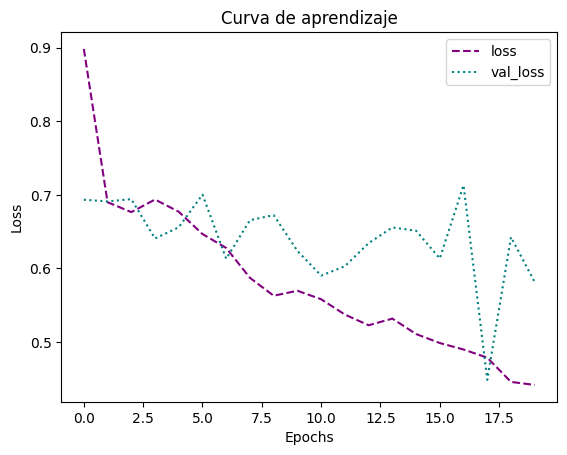

In [63]:
#GRAFICACIÓN DE LA CURVA DE PÉRDIDA
fig = plt.figure()
plt.plot(historial_NA.history['loss'], color='purple', label='loss', ls = "--")
plt.plot(historial_NA.history['val_loss'], color='teal', label='val_loss', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Curva de Pérdida')
plt.legend()
plt.show()

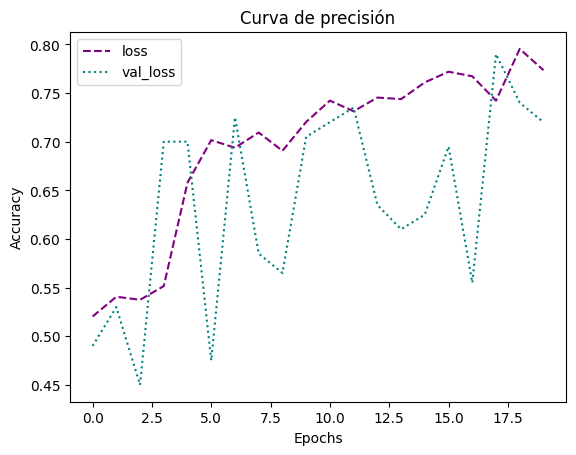

In [64]:
#GRAFICACIÓN DE LA CURVA DE PRECISIÓN
fig = plt.figure()
plt.plot(historial_NA.history['accuracy'], color='purple', label='loss', ls = "--")
plt.plot(historial_NA.history['val_accuracy'], color='teal', label='val_loss', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curva de precisión')
plt.legend()
plt.show()

In [67]:
#COMPUTACIÓN DE MÉTRICAS DEL RENDIMIENTO Y GENERACIÓN DE PREDICCIONES
Prec_NA= Precision()
Rec_NA = Recall()
Acc_NA = BinaryAccuracy()
for bache in tst_NA.as_numpy_iterator():
  X, y = bache[0], bache[1]
  y_pred = red_conv_NA.predict(X)
  Prec_NA.update_state(y, y_pred)
  Rec_NA.update_state(y, y_pred)
  Acc_NA.update_state(y, y_pred)

1/1 [==============================] - 0s 240ms/step


In [69]:
#VALORES PARA CADA MÉTRICA
print(Prec_NA.result().numpy(), Rec_NA.result().numpy(), Acc_NA.result().numpy())

0.85714287 0.4390244 0.686747


In [8]:
#GENERACIÓN PARAMETROS DE AUMENTACIÓN DE DATOS
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
#CREACIÓN DE LA FUNCIÓN DE AUMENTACIÓN
def aumentador(origen, clase, destino, estado, aumento):
        for archivo in os.listdir(os.path.join(origen, clase)):
                    img_ruta = os.path.join(os.path.join(origen, clase), archivo)
                    img = cv2.imread(img_ruta)
                    if img is not None:
                        original_img_ruta_aug = os.path.join(os.path.join(destino,estado), archivo)
                        cv2.imwrite(original_img_ruta_aug, img)

                        x = img_to_array(img)
                        x = np.expand_dims(x, axis=0)

                        i = 0
                        for batch in datagen.flow(x, batch_size=1, save_to_dir=os.path.join(destino,estado), save_prefix=clase, save_format='jpg'):
                            i += 1
                            if i >= aumento:
                                break

In [ ]:
#AUMENTACIÓN DE DATOS
aumentador(ruta_corales, saludables, ruta_aumentados, aug_sal, 1)
aumentador(ruta_corales, blanqueados, ruta_aumentados, aug_blanq, 1)

In [ ]:
#VISUALIZACIÓN DE LA CANTIDAD DE IMAGENES AUMENTADAS EN CORALES SALUDABLES
num_aug_sal = len([f for f in os.listdir(os.path.join(ruta_aumentados, aug_sal))])
num_arch_sal = len([f for f in os.listdir(os.path.join(ruta_corales,saludables))])
print(num_aug_sal, num_arch_sal)

865 438


In [ ]:
#VISUALIZACIÓN DE LA CANTIDAD DE IMAGENES AUMENTADAS EN CORALES BLANQUEADOS
num_aug_bl = len([f for f in os.listdir(os.path.join(ruta_aumentados, aug_blanq))])
num_arch_bl = len([f for f in os.listdir(os.path.join(ruta_corales,blanqueados))])
print(num_aug_bl, num_arch_bl)

956 485


In [ ]:
#CARGANDO DATUS AUMENTADOS Y ORIGINALES EN UN DATASET
ds = tf.keras.utils.image_dataset_from_directory(ruta_aumentados, image_size=(250,250), batch_size=20, shuffle=True)
iter = ds.as_numpy_iterator()
bache= iter.next()

Found 1821 files belonging to 2 classes.


In [ ]:
bache[0].shape

(20, 250, 250, 3)

In [ ]:
bache[1]

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

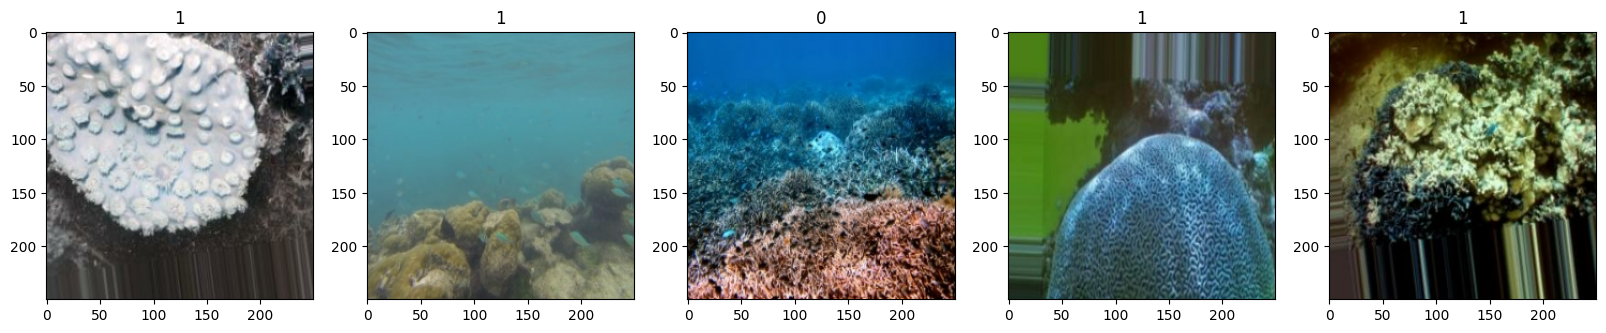

In [ ]:
#VISUALIZACIÓN DE DATOS AUMENTADOS
fig,ax = plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate(bache[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(bache[1][idx])

In [ ]:
ds_escalado = ds.map(lambda x,y: (x/255,y))
test_baches=ds_escalado.as_numpy_iterator().next()[0]
test_baches.max()

1.0

In [ ]:
trn = int(len(ds_escalado)*0.7)
val = int(len(ds_escalado)*0.2)+1
tst = int(len(ds_escalado)*0.1)+1
trn_ds = ds_escalado.take(trn)
val_ds = ds_escalado.skip(trn).take(val)
tst_ds = ds_escalado.skip(trn+val).take(tst)

In [ ]:
red_conv = Sequential()
red_conv.add(Conv2D(30, (3,3), 1, activation='relu', input_shape=(250,250,3)))
red_conv.add(MaxPooling2D())
red_conv.add(Dropout(0.3))
red_conv.add(Conv2D(45, (3,3), 1, activation='relu'))
red_conv.add(MaxPooling2D())
red_conv.add(Dropout(0.2))
red_conv.add(Conv2D(30, (3,3), 1, activation='relu'))
red_conv.add(MaxPooling2D())
red_conv.add(Flatten())
red_conv.add(Dense(250, activation='relu'))
red_conv.add(Dropout(0.5))
red_conv.add(Dense(1, activation='sigmoid'))

In [ ]:
red_conv.compile(optimizer=Adam(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
red_conv.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 248, 248, 30)      840       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 124, 124, 30)      0         
 ng2D)                                                           
                                                                 
 dropout_53 (Dropout)        (None, 124, 124, 30)      0         
                                                                 
 conv2d_49 (Conv2D)          (None, 122, 122, 45)      12195     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 61, 61, 45)        0         
 ng2D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 61, 61, 45)      

In [ ]:
historial = red_conv.fit(trn_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
64/64 [==============================] - 14s 186ms/step - loss: 0.9980 - accuracy: 0.5906 - val_loss: 0.6651 - val_accuracy: 0.6684
Epoch 2/20
64/64 [==============================] - 12s 176ms/step - loss: 0.6092 - accuracy: 0.6891 - val_loss: 0.6474 - val_accuracy: 0.6816
Epoch 3/20
64/64 [==============================] - 13s 195ms/step - loss: 0.5900 - accuracy: 0.6836 - val_loss: 0.5870 - val_accuracy: 0.6947
Epoch 4/20
64/64 [==============================] - 12s 184ms/step - loss: 0.5820 - accuracy: 0.7023 - val_loss: 0.6130 - val_accuracy: 0.6974
Epoch 5/20
64/64 [==============================] - 12s 185ms/step - loss: 0.5804 - accuracy: 0.7117 - val_loss: 0.5950 - val_accuracy: 0.6842
Epoch 6/20
64/64 [==============================] - 12s 183ms/step - loss: 0.5665 - accuracy: 0.7133 - val_loss: 0.6024 - val_accuracy: 0.6447
Epoch 7/20
64/64 [==============================] - 12s 179ms/step - loss: 0.5596 - accuracy: 0.7102 - val_loss: 0.6175 - val_accuracy: 0.6921

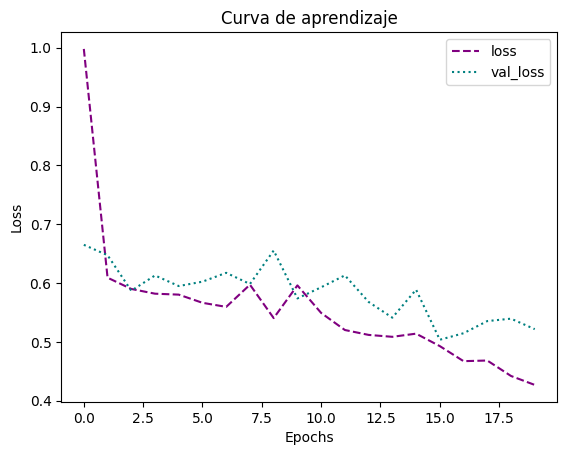

In [ ]:
fig = plt.figure()
plt.plot(historial.history['loss'], color='purple', label='loss', ls = "--")
plt.plot(historial.history['val_loss'], color='teal', label='val_loss', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

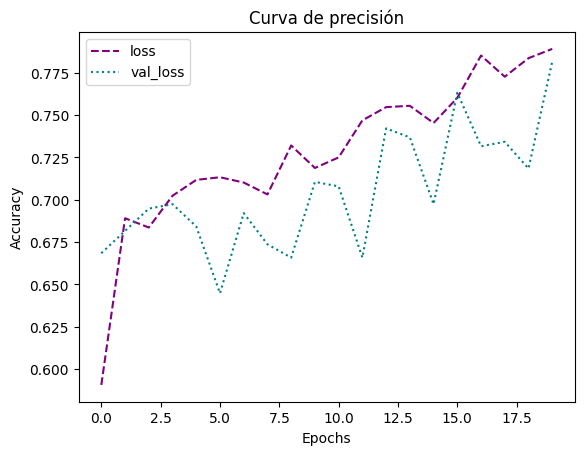

In [ ]:
fig = plt.figure()
plt.plot(historial.history['accuracy'], color='purple', label='loss', ls = "--")
plt.plot(historial.history['val_accuracy'], color='teal', label='val_loss', ls = ":")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curva de precisión')
plt.legend()
plt.show()

In [ ]:
Prec= Precision()
Rec = Recall()
Acc = BinaryAccuracy()
for bache in tst_ds.as_numpy_iterator():
  X, y = bache[0], bache[1]
  y_pred = red_conv.predict(X)
  Prec.update_state(y, y_pred)
  Rec.update_state(y, y_pred)
  Acc.update_state(y, y_pred)

1/1 [==============================] - 0s 269ms/step


In [ ]:
print(Prec.result().numpy(), Rec.result().numpy(), Acc.result().numpy())

0.85714287 0.67346936 0.7329193


In [70]:
print(Prec_NA.result().numpy(), Rec_NA.result().numpy(), Acc_NA.result().numpy())

0.85714287 0.4390244 0.686747


# Análisis de Métricas de Modelos de Predicción Binaria

Para determinar cuál modelo es mejor, debemos considerar todas las métricas, ya que cada una proporciona una perspectiva diferente del desempeño del modelo:

1. **Precisión**: Es la proporción de verdaderos positivos sobre el total de predicciones positivas. Una alta precisión significa que el modelo tiene pocos falsos positivos.
2. **Recall (sensibilidad)**: Es la proporción de verdaderos positivos sobre el total de casos positivos reales. Un alto recall indica que el modelo tiene pocos falsos negativos.
3. **Exactitud (binary accuracy)**: Es la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones.

### Comparación de Modelos

#### Modelo sin técnicas de data augmentation:
- **Precisión**: 0.85714287
- **Recall**: 0.67346936
- **Exactitud (binary accuracy)**: 0.7329193

#### Modelo con data augmentation:
- **Precisión**: 0.85714287
- **Recall**: 0.4390244
- **Exactitud (binary accuracy)**: 0.686747

### Análisis:

- **Precisión**: Ambos modelos tienen la misma precisión (0.85714287). Esto significa que, cuando predicen un caso como positivo, ambos modelos tienen la misma proporción de verdaderos positivos.
  
- **Recall**: El recall es significativamente mayor en el Modelo 1 (0.67346936) en comparación con el Modelo 2 (0.4390244). Esto indica que el Modelo 1 es mejor para identificar los casos positivos, lo cual es importante en problemas donde es crucial minimizar los falsos negativos (por ejemplo, en la detección de enfermedades).

- **Exactitud**: La exactitud también es mayor en el Modelo 1 (0.7329193) en comparación con el Modelo 2 (0.686747). Esto significa que el Modelo 1 tiene una mayor proporción de predicciones correctas en general.

### Conclusión:

El **Modelo sin aumento** es superior porque tiene un mejor recall y una mejor exactitud (binary accuracy), lo que indica un desempeño más equilibrado y robusto en la identificación tanto de corales blanqueados como de sanos correctos y por tanto es el más apto para un despliegue de prueba.


